## Import Librarries

In [1]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

-----------------------
## Read Data

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

dataset_dir = keras.utils.get_file(fname = 'flower_photos' , origin = dataset_url , cache_dir='.',untar=True)


--------------------
## Data preparation

In [3]:
import pathlib

datadir = pathlib.Path(dataset_dir)
datadir

PosixPath('datasets/flower_photos')

--------------------------

In [4]:
flowers = {'daisy' : list(datadir.glob("daisy/*")),
'dandelion' : list(datadir.glob("dandelion/*")),
'roses' : list(datadir.glob("roses/*")),
'sunflowers' : list(datadir.glob("sunflowers/*")),
'tulips' : list(datadir.glob("tulips/*"))}

lables = {
    'daisy' : 0 ,
    'dandelion' : 1 ,
    'roses' : 2,
    'sunflowers' : 3 ,
    'tulips' :4
}

-----------------
## Visualize Some Images

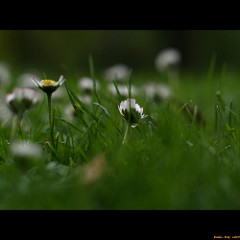

In [5]:

PIL.Image.open(str(flowers['daisy'][0]))


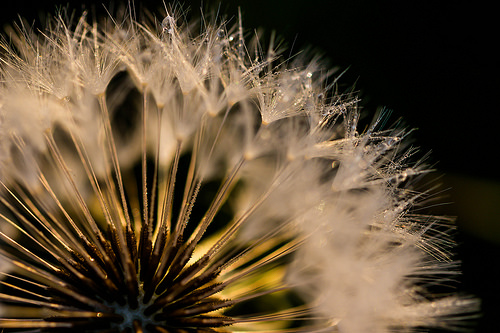

In [6]:
PIL.Image.open(str(flowers['dandelion'][0]))

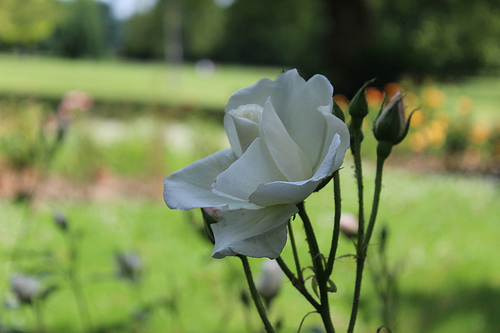

In [7]:
PIL.Image.open(str(flowers['roses'][8]))

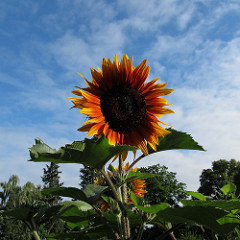

In [8]:
PIL.Image.open(str(flowers['sunflowers'][10]))

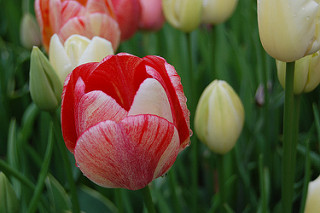

In [9]:
PIL.Image.open(str(flowers['tulips'][6]))

--------------------
## Extract images' data and lables

In [10]:
x =[]
y = []

for image_name , image in flowers.items():
  for img in image :
    img = cv2.imread(str(img)) # converts image form its dir to np array to represent image
    resized = cv2.resize(img , (224,224))
    x.append(resized)
    y.append(lables[image_name])

In [11]:
x = np.array(x)
y = np.array(y)


In [12]:
x_train , x_test , y_train , y_test  = train_test_split(x,y , test_size=.2 , stratify = y)

In [13]:
x_train.shape

(2936, 224, 224, 3)

In [14]:
x_test.shape

(734, 224, 224, 3)

In [15]:
# scalin data
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

--------------------
## Build Neural Network (CNN)

In [16]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (224,224,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.2)


])

model = keras.models.Sequential([

    data_augmentation,

    keras.layers.Conv2D(filters = 16,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters = 64,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(filters = 128,kernel_size = (3,3) , activation = 'relu',padding = 'same'),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(5,activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled,y_train , epochs = 30)

Epoch 1/30
92/92 [==============================] - 18s 40ms/step - loss: 1.3981 - accuracy: 0.3733
Epoch 2/30
92/92 [==============================] - 3s 37ms/step - loss: 1.1470 - accuracy: 0.5208
Epoch 3/30
92/92 [==============================] - 3s 34ms/step - loss: 1.0511 - accuracy: 0.5644
Epoch 4/30
92/92 [==============================] - 3s 34ms/step - loss: 0.9568 - accuracy: 0.6117
Epoch 5/30
92/92 [==============================] - 3s 35ms/step - loss: 0.9085 - accuracy: 0.6291
Epoch 6/30
92/92 [==============================] - 3s 37ms/step - loss: 0.8701 - accuracy: 0.6413
Epoch 7/30
92/92 [==============================] - 3s 34ms/step - loss: 0.8376 - accuracy: 0.6737
Epoch 8/30
92/92 [==============================] - 3s 36ms/step - loss: 0.8228 - accuracy: 0.6723
Epoch 9/30
92/92 [==============================] - 4s 40ms/step - loss: 0.7919 - accuracy: 0.6826
Epoch 10/30
92/92 [==============================] - 3s 36ms/step - loss: 0.7527 - accuracy: 0.6965
Epoch 11

In [17]:
model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 1s 40ms/step - loss: 0.6582 - accuracy: 0.7643


[0.6582416892051697, 0.7643051743507385]

-----------------
## Using Transfer Learning [ Mobilenet ]

In [18]:
import tensorflow_hub as hub

pretrained_layer = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" , input_shape = (224,224,3))
])

pretrained_model = keras.Sequential([
    pretrained_layer ,
    keras.layers.Dense(5,activation = 'softmax')
])

pretrained_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

pretrained_model.fit(x_train_scaled, y_train,epochs = 10)

Epoch 1/10
92/92 [==============================] - 12s 49ms/step - loss: 0.7764 - accuracy: 0.7193
Epoch 2/10
92/92 [==============================] - 4s 45ms/step - loss: 0.3991 - accuracy: 0.8580
Epoch 3/10
92/92 [==============================] - 4s 44ms/step - loss: 0.3084 - accuracy: 0.8958
Epoch 4/10
92/92 [==============================] - 4s 43ms/step - loss: 0.2626 - accuracy: 0.9189
Epoch 5/10
92/92 [==============================] - 4s 43ms/step - loss: 0.2196 - accuracy: 0.9363
Epoch 6/10
92/92 [==============================] - 4s 46ms/step - loss: 0.1916 - accuracy: 0.9452
Epoch 7/10
92/92 [==============================] - 4s 43ms/step - loss: 0.1676 - accuracy: 0.9578
Epoch 8/10
92/92 [==============================] - 4s 43ms/step - loss: 0.1501 - accuracy: 0.9625
Epoch 9/10
92/92 [==============================] - 4s 47ms/step - loss: 0.1375 - accuracy: 0.9670
Epoch 10/10
92/92 [==============================] - 4s 44ms/step - loss: 0.1248 - accuracy: 0.9731


In [20]:
pretrained_model.evaluate(x_test_scaled,y_test)

23/23 [==============================] - 2s 50ms/step - loss: 0.3278 - accuracy: 0.9005


[0.3278326988220215, 0.9005449414253235]